In [1]:
import pandas as pd
df = pd.read_csv('..\\..\\data\\猫鸭账单_2025年.csv', engine='python', encoding='utf-8-sig')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 7 columns):
摘要    432 non-null object
日期    432 non-null object
分类    432 non-null object
金额    432 non-null float64
收支    432 non-null object
流水    432 non-null object
月份    432 non-null object
dtypes: float64(1), object(6)
memory usage: 23.7+ KB


# 1 分析消费类别占比
1. 过滤掉收入和预算——也就是只保留支出数据
2. 将数据按类别进行聚合
3. 将聚合后的数据，可视化展示，按从大到小/从小到大的顺序

In [3]:
expense_df = df[df['收支'] == '支出']
expense_df.head()

,摘要,日期,分类,金额,收支,流水,月份
0,晚餐潮牛牛,2025/01/01,饮食,182.00,支出,-¥182.00,1 月
1,午餐鲜烫牛肉粉,2025/01/01,饮食,34.90,支出,-¥34.90,1 月
2,百果园充值,2025/01/01,水果,94.00,支出,-¥94.00,1 月
3,美团买菜,2025/01/02,饮食,42.88,支出,-¥42.88,1 月
4,一次性棉球,2025/01/01,宠物,0.60,支出,-¥0.60,1 月


## 1.1 数据聚合
使用`DataFrame`的`groupby`对数据按照指定的“列”进行聚合

In [4]:
gb = expense_df.groupby('分类')
type(gb)

pandas.core.groupby.groupby.DataFrameGroupBy

## 1.2 查看`DataFrameGroupBy`对象
当你对`DataFrameGroupBy`对象迭代（用`for-in`去访问它）的时候，每次迭代的第一项是group的名称，第二项是这个group对应的子`DataFrame`

In [5]:
for name, group in gb:
    print(f"group name: {name}")
    #print(group.head())

group name: 交通
group name: 其他
group name: 医疗
group name: 娱乐
group name: 宠物
group name: 家里
group name: 日用
group name: 服饰
group name: 水果
group name: 电子器件
group name: 租房
group name: 话费
group name: 零食
group name: 饮食


## 1.3 提取金额信息，得到`SeriesGroupBy`对象

In [6]:
gb_money = gb['金额']
type(gb_money)

pandas.core.groupby.groupby.SeriesGroupBy

## 1.4 对`SeriesGroupBy`取`sum()`，得到每个分类的总金额

In [7]:
money_series = gb_money.sum()
money_series

分类
交通        373.15
其他        132.98
医疗        661.96
娱乐       1309.90
宠物      31391.67
家里       4000.00
日用        629.31
服饰       1401.21
水果       1036.29
电子器件     1178.76
租房       5794.00
话费        313.73
零食        261.00
饮食       6592.08
Name: 金额, dtype: float64

## 1.5 对分类总金额排序，使用`Series`的`sort_values`方法，可以指定`ascending`决定升/降序

In [8]:
sorted_money_series = money_series.sort_values(ascending=False)
sorted_money_series

分类
宠物      31391.67
饮食       6592.08
租房       5794.00
家里       4000.00
服饰       1401.21
娱乐       1309.90
电子器件     1178.76
水果       1036.29
医疗        661.96
日用        629.31
交通        373.15
话费        313.73
零食        261.00
其他        132.98
Name: 金额, dtype: float64

## 1.6 对整理好的数据可视化展示
在Python里最常用的可视化库就是`matplotlib`的库，以及它的`pyplot`子库

In [22]:
# 导入matplotlib库
import matplotlib as mpl
# 导入它的pyplot子库：两种写法
# import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [10]:
# 设置中文显示（不用记）
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

### 1.6.1 使用`plt.pie`来绘制饼图，使用前面的数据

In [12]:
list(sorted_money_series.index)

['宠物',
 '饮食',
 '租房',
 '家里',
 '服饰',
 '娱乐',
 '电子器件',
 '水果',
 '医疗',
 '日用',
 '交通',
 '话费',
 '零食',
 '其他']

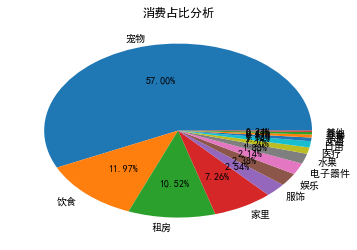

In [31]:
# 扇区对象列表，标签文本对象列表，百分比文本对象列表
patches, texts, autotexts = plt.pie(sorted_money_series, labels=sorted_money_series.index, autopct='%1.2f%%')
plt.title('消费占比分析')
plt.show()